The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part


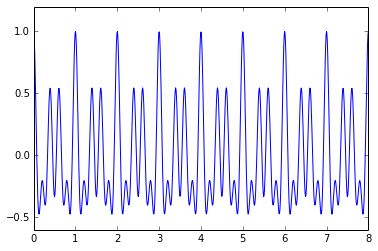

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division

import numpy as np
import matplotlib.pyplot as plt

from pygrfnn import GrFNN, Zparam
from pygrfnn.network import Model, make_connections
from pygrfnn.vis import tf_detail, plot_connections


# stimulus
sr = 100
freqs = [2.0, 3.0, 5.0]
dur = 8.0
t = np.linspace(0, dur, dur*sr)
x = np.zeros_like(t)
for f0 in freqs:
    x += np.exp(2j*np.pi*f0*t) / len(freqs)

plt.plot(t, np.real(x))

Calculating 3freq with params: N=10, tol=0.0001, lowest_order_only=True
800/800 done!


(<matplotlib.figure.Figure at 0x1133d2ad0>,
 None,
 None,
 None)

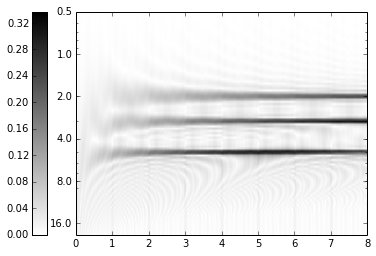

In [24]:
# model
f_range = (0.5, 20)
oscs = 100

zp = Zparam(alpha=-0.05, beta1=0.2, beta2=-2.0, epsilon=1.0)
l = GrFNN(zp, frequency_range=f_range, num_oscs=oscs, stimulus_conn_type='linear', z0=0)

m = Model()
m.add_layer(l, input_channel=0)

C = make_connections(l, l, 
                     modes=[1/3, 1/2, 1, 2, 3], 
                     mode_amps=[1, 1, 1, 1, 1],
                     strength=1.0,
                     range=1.01,  # I HAVEN'T RUN THIS YET
                    self_connect=True)

m.connect_layers(l, l, C, 
#                  connection_type='2freq', 
                 connection_type='3freq', 
                 connection_params = {'N': 10, 'tol': 1e-4},
                 self_connect=True,
                 weight=0.02)
# print C
# plot_connections(m.connections[l][0])

gain = 0.1

m.run(gain*x, t, 1/sr)


tf_detail(l.Z, t, l.f)

In [12]:
X = np.random.randint(1,25,(5,5))
I = np.array([[0, 2, 3], [1, 4, 2], [3, 2, 4]])

print X
print I

cij1, cij2 = [X[k[0], k[2]] for k in I], [X[k[1], k[2]] for k in I]


C = np.vstack((cij1, cij2)).T
print C


[[21 19 21  2  6]
 [16 15  6 12 19]
 [18 20  7 21 12]
 [18  1 10 24  5]
 [14  7  5 12 24]]
[[0 2 3]
 [1 4 2]
 [3 2 4]]
[[ 2 21]
 [ 6  5]
 [ 5 12]]
